<a href="https://colab.research.google.com/github/sakshigithubit/ML-Projects/blob/main/gold_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
c=df.corr()

<ipython-input-33-5ed55de78997>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c=df.corr()


<Axes: >

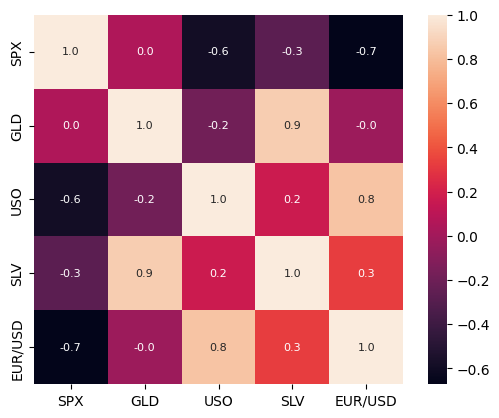

In [ ]:
#plt.figure(figsize=(8,8))
sns.heatmap(c,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8})

<ipython-input-35-e6e05239e17b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'])


<Axes: xlabel='GLD', ylabel='Density'>

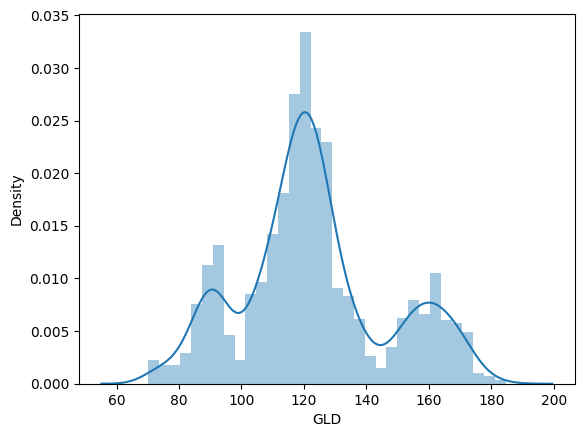

In [ ]:
sns.distplot(df['GLD'])

In [ ]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
X = df.drop(['Date','GLD'],axis=1)

In [ ]:
Y = df['GLD']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
model = RandomForestRegressor(n_estimators=100)

In [ ]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
test_pred = model.predict(X_test)

In [ ]:
error_sc = metrics.r2_score(Y_test,test_pred)
error_sc

0.9899300750191955

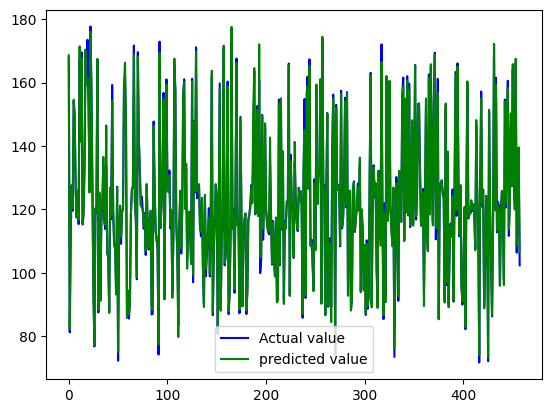

In [ ]:
Y_test = list(Y_test)
plt.plot(Y_test,color='blue',label='Actual value')
plt.plot(test_pred,color='green',label='predicted value')
plt.legend()
plt.show()